In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
attributes = {
    "Price": ["Low", "Medium", "High"],
    "Color": ["Red", "Blue", "Green"],
    "Brand": ["Brand A", "Brand B"]
}

In [ ]:
from itertools import product

In [5]:
levels = list(product(*attributes.values()))
profiles = pd.DataFrame(levels, columns=attributes.keys())

In [6]:
profiles["ProfileID"] = range(1, len(profiles) + 1)

In [7]:
print("Generated Profiles:")
print(profiles)

Generated Profiles:
     Price  Color    Brand  ProfileID
0      Low    Red  Brand A          1
1      Low    Red  Brand B          2
2      Low   Blue  Brand A          3
3      Low   Blue  Brand B          4
4      Low  Green  Brand A          5
5      Low  Green  Brand B          6
6   Medium    Red  Brand A          7
7   Medium    Red  Brand B          8
8   Medium   Blue  Brand A          9
9   Medium   Blue  Brand B         10
10  Medium  Green  Brand A         11
11  Medium  Green  Brand B         12
12    High    Red  Brand A         13
13    High    Red  Brand B         14
14    High   Blue  Brand A         15
15    High   Blue  Brand B         16
16    High  Green  Brand A         17
17    High  Green  Brand B         18


In [8]:
np.random.seed(42)
n_respondents = 50
respondent_data = []

In [9]:
for respondent_id in range(1, n_respondents + 1):
    utilities = (
        np.random.uniform(-1, 1, len(attributes["Price"]))[profiles["Price"].map({"Low": 0, "Medium": 1, "High": 2})]
        + np.random.uniform(-1, 1, len(attributes["Color"]))[profiles["Color"].map({"Red": 0, "Blue": 1, "Green": 2})]
        + np.random.uniform(-1, 1, len(attributes["Brand"]))[profiles["Brand"].map({"Brand A": 0, "Brand B": 1})]
    )
    rankings = utilities + np.random.normal(0, 0.2, len(profiles))
    respondent_data.append(rankings)

In [10]:
respondent_df = pd.DataFrame(respondent_data, columns=profiles["ProfileID"])
respondent_df["RespondentID"] = range(1, n_respondents + 1)
respondent_long = respondent_df.melt(id_vars=["RespondentID"], var_name="ProfileID", value_name="Ranking")

In [11]:
respondent_long["ProfileID"] = respondent_long["ProfileID"].astype(int)
data = respondent_long.merge(profiles, on="ProfileID")

In [12]:
data_encoded = pd.get_dummies(data, columns=["Price", "Color", "Brand"], drop_first=True)

In [13]:
X = data_encoded.drop(columns=["RespondentID", "ProfileID", "Ranking"])
y = data_encoded["Ranking"]

In [14]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [15]:
coefficients = pd.Series(model.coef_, index=X.columns)
coefficients.name = "Utility"
coefficients = coefficients.reset_index().rename(columns={"index": "Attribute"})

In [16]:
coefficients["Importance"] = coefficients["Utility"].abs() / coefficients["Utility"].abs().sum() * 100

In [17]:
print("\nPart-Worth Utilities and Importance:")
print(coefficients)


Part-Worth Utilities and Importance:
       Attribute   Utility  Importance
0      Price_Low  0.016149    2.321185
1   Price_Medium  0.140935   20.257905
2    Color_Green  0.183964   26.442848
3      Color_Red -0.066214    9.517549
4  Brand_Brand B  0.288442   41.460513


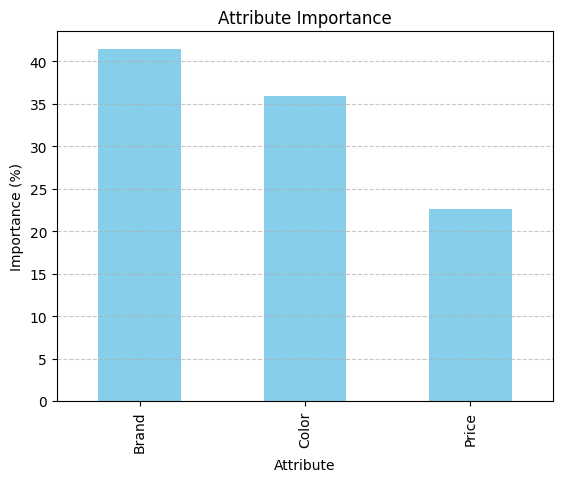

In [18]:
importance = coefficients.groupby(coefficients["Attribute"].str.split("_").str[0]).sum()["Importance"]
importance.plot(kind="bar", color="skyblue", title="Attribute Importance", ylabel="Importance (%)", xlabel="Attribute")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()